# INFO 3350/6350

## Lecture 13: Feature standardization, normalization, and dimension reduction

## To do

* HW 6 (corpus building) due Thursday, 11:59pm
    * Make sure you have the updated guidelines from CMS (updated Saturday afternoon, March 5)
* Next week (feature importance and explainability)
    * Monday: Read "The importance of human-interpretable ML"
    * Wednesday: Read articles by Underwood and by Yauney
        * Response to Underwood or Yauney due by 4:00pm by next Tuesday, 3/15, if assigned to you by NetID.
    * Friday: Section as usual

## Measuring classifier performance

In this lecture -- and for the next couple of weeks -- we'll talk about factors that affect classifier performance. But how should we *measure* performance? 

In the last lecture, we scored our classifiers on **accuracy**, that is, the fraction of all predictions that are correct. This can be fine, but it's not well suited to cases in which we have different-size classes and it doesn't capture whether we do equally well on any one class.

Machine learning tends instead to measure performance using **precision**, **recall**, and $F_1$. Here's what those terms mean:

* **Precision** is the fraction of positive predictions for a given class that are correct. In other words, when we predict that an object belongs to a class, how likely are we to be right about it?
* **Recall** is the fraction of all positive instances in the data set that are predicted positive. In other words, from among all the objects we *should* have assigned to a class, what fraction of them did we catch?

You can see that precision and recall tend to involve a tradeoff in real-world settings. You can achieve high precision if you're very conservative about labeling marginal cases. You can get high recall by being much more liberal with your labels. Consider two limit cases of a simple problem:

> I ask you to bring me all the books by Toni Morrison that are held in the Cornell libraries. Favoring precision, you bring me just one book, a first-edition copy of _The Bluest Eye_ (great book, by the way) and nothing else. You're right that it's by Morrison, so your precision is perfect (1.0). But your recall is really bad. If there are 108 Morrison volumes in the library (which there are, for certain deifnitions of "by", "in", "Cornell," "libraries," and "books"), you have correctly retrieved less than 1% of them. Or maybe you favor recall, so you bring me every book in the library (about 8 million of them). Yikes. In this case, recall is perfect (you *did* bring me every book by Morrison), but your precision is terrible (of the 8 million books you labeled as "by Toni Morrison," only 20 of them were correct (about 0.00025%).

* $F_1$ is one way to assess the combination of precision and recall. It's just the *harmonic mean* of those two numbers. A harmonic mean is a conservative estimate of the average value, because it is affected more by small values than by large ones. 
    * You don't really need to know how to calculate $F_1$, but it's not hard. You take the reciprocal of the (familiar, plain vanilla) arithmetic mean of the reciprocals of your observations.
    * In the first Morrison example (high precision, low recall), precision = 1.0 and recall = 0.01 (rounding a bit). 
    * The regular (non-harmonic) mean would be about 0.5 ($=(1.0 + 0.01)/2$)
    * $F_1$ is:
    
$$F_1 = \left( \frac{1.0^{-1}+0.01^{-1}}{2} \right)^{-1} = \frac{2}{1 + 100} = 0.02$$

$F_1$ for the high-recall case would be even worse, since precision in that case is even closer to zero. Most real-world cases aren't as extreme as these, but the idea is the same. $F_1$ avoids artificially inflated estimates of classifier performance. In general, it's what you (and other machine learning researchers) want to use as your accuracy/performance metric.

## Normalization and standardization

First, note that the terms "normalization" and "standardization" are sometimes used interchangably or inconsistently. So be sure you understand what's going on in any given instance if you encounter there terms in the wild. In this class, we'll try to be consistent with the definitions below.

### Normalization (`l1`, `l2`)

* Normalization is the process by which we ensure that each vector in our feature matrix has the same length
    * Normalization works *row-wise*, not *column-wise*. That is, we normalize the features attached to each *observation*.
* The details vary, depending on our distance (length) metric
* The two most commonly used normalizations are `l1` and `l2`
* `l1` normalization adjusts the features so that they sum to one in each vector.
    * This means that the *Manhattan length* of each vector is one
    * It also means that the normalized value of each feature represents the fraction of the total feature counts/weight accounted for by that feature in a given document
    * As previously discussed, `l1` norms preserve the original ratios between the features. This is often good for accuracy on downstream tasks.
* `l2` normalization adjusts each vector so that the sum of the squared features is one
    * This means that the *Euclidean length* of each vector is one
    * `l2` norms decrease the effective weight of low-frequency features (hence, they increase the relative weight of high-frequency features). This can be good for interpretation, because it means that downstream tasks rely on a comparatively sparse set of important features.


### Standardization (*z*-scores)

* Even when we normalize our vectors, distances and similarities are dominated by common terms
    * Common terms contribute most of the weight to the overall vector
    * This might be what we want ...
    * ... or it might not.
* What if we care about the comparative usage rates of each included feature (word)?
    * That is, what if every word should contribute equally?
    * We could scale between, say, 0 and 1
        * But then we're at the mercy of high and low outliers
    * Instead, we often scale to mean zero and standard deviation one.
        * This is called a "standard score" or "*z*-score."
* Standardization works *column-wise*. That is, it makes every *feature*, across all observations, as important as every other feature.

Typically, you'll normalize first, then scale. But some situations call for just one or the other, or are not especially sensitive to either one. You might *not* want to normalize or scale if your feature data share a common (and meaningful) scale and are already normally distributed. Leaving your data alone in that case may not make much diffrence for your task performance and may make it easier to interpret your results.

# An example

Consider the following example of normalization and standardization:

In [1]:
import pandas as pd
import numpy as np
from   sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from   sklearn.metrics.pairwise import euclidean_distances

sample = [
    [10,11,11,12],
    [0,0,1,1],
    [0,5,7,10]
]
df = pd.DataFrame(sample).T
df.columns = ['the', 'cat', 'she']

print('raw features:')
display(df)
print("raw mean:", round(np.mean(df.to_numpy()),2))
print('raw distances:')
display(pd.DataFrame(euclidean_distances(df)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n\nmin-max scaling:')
minmax = MinMaxScaler().fit_transform(df)
display(minmax)
print("min-max mean:", round(np.mean(minmax),3))
print('min-max distances:')
display(pd.DataFrame(euclidean_distances(minmax)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n\nz-scores:')
zscores = StandardScaler().fit_transform(df)
display(zscores)
print('z-score mean:', round(np.mean(zscores),3))
print('z-score distances:')
display(pd.DataFrame(euclidean_distances(zscores)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n=====\nl1 norm:')
l1 = normalize(df, norm='l1')
display(l1)
print('l1 mean:', round(np.mean(l1),3))
print('l1 distances:')
display(pd.DataFrame(euclidean_distances(l1)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n\nl2 norm:')
l2 = normalize(df, norm='l2')
display(l2)
print('l2 mean:', round(np.mean(l2),3))
print('l2 distances:')
display(pd.DataFrame(euclidean_distances(l2)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n=====\nz-scored l2 norm:')
zl2 = StandardScaler().fit_transform(l2)
display(zl2)
print('z-scored l2 mean:', round(np.mean(zl2),3))
print('z-scored l2 distances:')
display(pd.DataFrame(euclidean_distances(zl2)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

raw features:


,the,cat,she
0,10,0,0
1,11,0,5
2,11,1,7
3,12,1,10


raw mean: 5.67
raw distances:


,0,1,2,3
0,nan,5.099020,7.141428,10.246951
1,5.099020,nan,2.236068,5.196152
2,7.141428,2.236068,nan,3.162278
3,10.246951,5.196152,3.162278,nan




min-max scaling:


array([[0. , 0. , 0. ],
       [0.5, 0. , 0.5],
       [0.5, 1. , 0.7],
       [1. , 1. , 1. ]])

min-max mean: 0.517
min-max distances:


,0,1,2,3
0,nan,0.707107,1.319091,1.732051
1,0.707107,nan,1.019804,1.224745
2,1.319091,1.019804,nan,0.583095
3,1.732051,1.224745,0.583095,nan




z-scores:


array([[-1.41421356, -1.        , -1.5109662 ],
       [ 0.        , -1.        , -0.13736056],
       [ 0.        ,  1.        ,  0.41208169],
       [ 1.41421356,  1.        ,  1.23624508]])

z-score mean: 0.0
z-score distances:


,0,1,2,3
0,nan,1.971495,3.114179,4.421218
1,1.971495,nan,2.074099,2.808343
2,3.114179,2.074099,nan,1.636840
3,4.421218,2.808343,1.636840,nan



=====
l1 norm:


array([[1.        , 0.        , 0.        ],
       [0.6875    , 0.        , 0.3125    ],
       [0.57894737, 0.05263158, 0.36842105],
       [0.52173913, 0.04347826, 0.43478261]])

l1 mean: 0.333
l1 distances:


,0,1,2,3
0,nan,0.441942,0.561951,0.647811
1,0.441942,nan,0.132970,0.210523
2,0.561951,0.132970,nan,0.088093
3,0.647811,0.210523,0.088093,nan




l2 norm:


array([[1.        , 0.        , 0.        ],
       [0.91036648, 0.        , 0.41380294],
       [0.84119102, 0.07647191, 0.53530338],
       [0.76665188, 0.06388766, 0.63887656]])

l2 mean: 0.437
l2 distances:


,0,1,2,3
0,nan,0.423399,0.563576,0.683152
1,0.423399,nan,0.159360,0.274579
2,0.563576,0.159360,nan,0.128226
3,0.683152,0.274579,0.128226,nan



=====
z-scored l2 norm:


array([[ 1.39839904, -0.99205722, -1.63605823],
       [ 0.35775253, -0.99205722,  0.06926421],
       [-0.4453755 ,  1.16994749,  0.56997939],
       [-1.31077608,  0.81416695,  0.99681463]])

z-scored l2 mean: 0.0
z-scored l2 distances:


,0,1,2,3
0,nan,1.997766,3.597273,4.187373
1,1.997766,nan,2.360084,2.628076
2,3.597273,2.360084,nan,1.028439
3,4.187373,2.628076,1.028439,nan


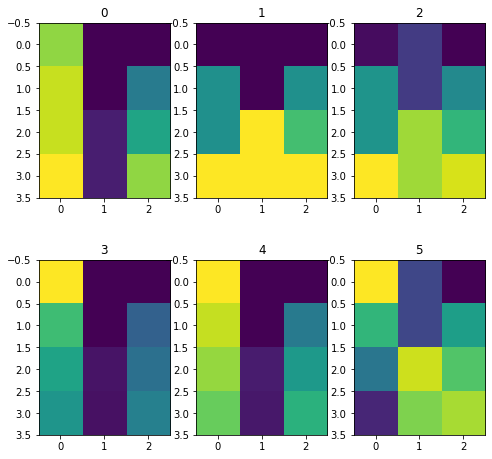

In [2]:
# a single plot with all six feature (not distance) matrices
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i, mat in enumerate([df, minmax, zscores, l1, l2, zl2]):
    plt.subplot(int(f'23{i+1}'))
    plt.imshow(mat)
    plt.title(i)
plt.show()  

**You almost certainly want to standardize your feature data, probably with *z*-scores, unless there's a good reason to do otherwise.**

## Dimension reduction

### The curse of dimensionality

* Low density of samples
    * Hard to identify "typical" or "average" points. 
    * Everything is an outlier.
    * All points are far apart (or have low similarity, or are uncorrelated).
* Multicolinearity
    * Always true when you have more dimensions than samples.
    * Many variables might be substituted for one another.
    * But *which ones*?
    * This is a problem if we want to *interpret* our model.
* Overfitting
    * Too much "detail" in our training data.
    * For example, say we care about cats in our texts.
        * Do we need features `['cat', 'cats', 'kitten', 'kittens', 'kitty', 'kitties', 'Cat', 'Cats', ...]`?
        * Probably not; any one of these, or their sum, would do.

The trick, then, is to figure out *which* features to keep (feature selection) and/or how collapse multiple features into one (dimension reduction).

Note that this explains why the Decision Tree classifier with a shallow tree depth performed well in the current problem set: it effectively performs dimension reduction via feature selection.

## Feature selection

We'll talk more about this later, but for now, a few key points:

* If a feature has the same value for most objects (that is, it has low variance), it is unlikely to be informative and is a good candidate for elimination.
* We're looking to hold on to as much of the underlying variance (information) in the data as possible, while eliminating as many features as possible.
    * Any measure of correlation or mutual information would help us identify features that provide similar information.
    * We might then drop one or more of those variables with little loss of overall information.
* We can also work empirically and *post hoc* by calculating feature importances from our classifier (where possible).
    * We then retain only the *n* most important features and examine the impact on classifier performance.


## Linear and manifold methods

But we can also *transform* our features, rather than just dropping some and retaining others.

Specifically, we can look for mathematical *combinations* of features that hold on to all or most of the underlying variance.

Consider:

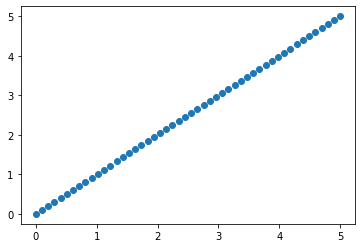

In [3]:
# linearly related variables
x = np.linspace(0,5)
y = x

plt.scatter(x,y)
plt.show()

* If we know *x*, we already know the *exact* value of *y*!
* Here, we could just drop *x* or *y*.

But what about this case?:

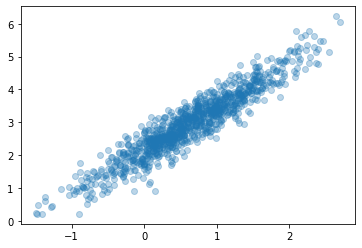

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=1)
transformation = [[-0.6, -0.6], [0.4, 0.8]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:,0], X_aniso[:,1], alpha=0.3);

### Principal component analysis (PCA)

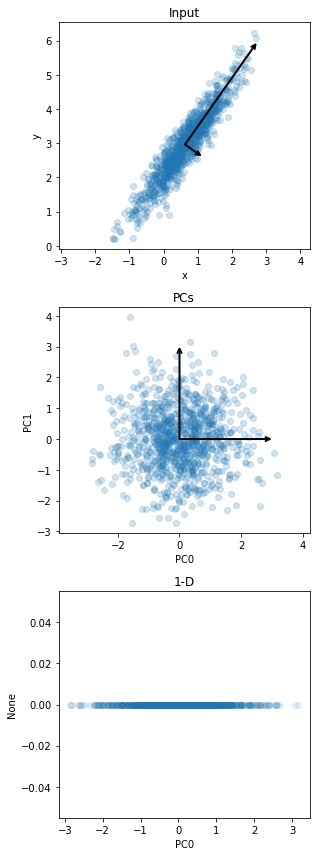

Explained variance: [0.97359816 0.02640184]


In [5]:
from sklearn.decomposition import PCA

# A function to draw vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Set up and fit PCA
pca = PCA(n_components=2, whiten=True) # whiten enforces some extra regularity on output
X_pca = pca.fit_transform(X_aniso)

# Plotting
fig, ax = plt.subplots(3,1, figsize=(4.5, 12))

# Input data
ax[0].scatter(X_aniso[:, 0], X_aniso[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='Input')

# PCA 2-D
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='PC0', ylabel='PC1',
          title='PCs')

# PCA 1-D
ax[2].scatter(X_pca[:,0], np.zeros(shape=len(X_aniso)), alpha=0.1)
ax[2].set(xlabel='PC0', ylabel='None', title='1-D')

plt.tight_layout()
plt.show()

print("Explained variance:", pca.explained_variance_ratio_)

### Truncated SVD

Singular Value Decomposition (SVD) is closely related to PCA. The only difference, from our perspective, is that, because PCA needs to standardize input data, it requires dense (rather than sparse) input. So, we use SVD (via `TrunctedSVD`) when we want to preserve input sparsity (e.g., when our dataset is very large). "Truncated" just means that we retain fewer dimensions in our output than existed in the input.

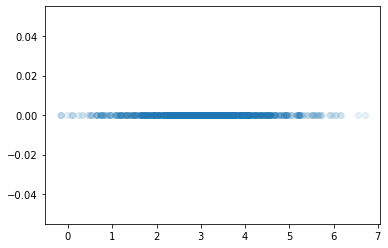

Explained variance: 0.8594
Explained variance using standardized data: 0.9705


In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1)
X = svd.fit_transform(X_aniso)
plt.scatter(X[:,0], np.zeros(shape=len(X)), alpha=0.1)
plt.show()
print('Explained variance:', round(svd.explained_variance_ratio_[0],4))
svd.fit_transform(StandardScaler().fit_transform(X_aniso))
print('Explained variance using standardized data:', round(svd.explained_variance_ratio_[0],4))

Notes:

* Standardizing our input data captures about the same amount of variance as does PCA. It's slightly different because we used the `whiten` option with PCA, which assures unit variance in each each reduced output dimension at the typical cost of a small amount of lost variance.
* We've used a one-dimensional plot here *not* because SVD is doing something different from PCA, but to show what dimension *reduction* looks like. We had 2-D inputs; it doesn't really make sense to use 2-D outputs!

### *t*-SNE

*t*-distributed Stochastic Neighbor Embedding is a *manifold* method. Features are projected into a multidimensional manifold rather than onto lines.

TSNE is (or was; see below) widely used for visualization, because it's good at maintaining internal structure ("lumpiness").

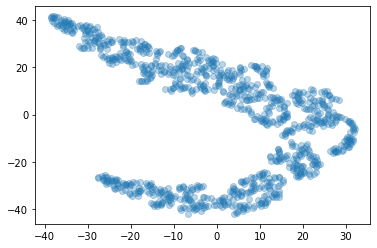

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(init='random', learning_rate='auto')
X = tsne.fit_transform(X_aniso)
plt.scatter(X[:,0], X[:,1], alpha=0.3);

### UMAP

Uniform Manifold Approximation and Projection (UMAP) is a manifold method, like *t*-SNE. It's more computationally efficient than *t*-SNE and tends to perform a bit better, too (in the sense that it preserves more of the underlying density structure. UMAP is generally preferred to *t*-SNE for visualization these days.

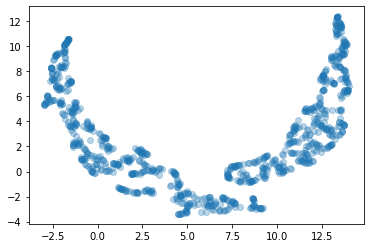

In [8]:
import umap

umap_reducer = umap.UMAP()
X = umap_reducer.fit_transform(X_aniso)
plt.scatter(X[:,0], X[:,1], alpha=0.3);

There are a bunch of parameters that control the performance of UMAP (and of *t*-SNE, too). If you make any real use of UMAP, you should read (and understand) [the documentation](https://umap-learn.readthedocs.io/en/latest/parameters.html#).